In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('cucumbers.csv')
df= df.drop(columns="cycle")
df.head()

,country,irrigation,sun,temperature,yield
0,Spain,2.657004,452.680020,20.450952,10.484136
1,Spain,4.361300,270.554441,22.211424,10.738837
2,Spain,3.930734,343.888517,20.479650,12.753241
3,Spain,3.912525,715.362181,15.710702,12.365033
4,Spain,2.636221,715.744196,14.974806,9.682015


In [ ]:
df_onehot = pd.get_dummies(df, 'country')
df_onehot.head(5)


,irrigation,sun,temperature,yield,country_Netherlands,country_Spain
0,2.657004,452.680020,20.450952,10.484136,0,1
1,4.361300,270.554441,22.211424,10.738837,0,1
2,3.930734,343.888517,20.479650,12.753241,0,1
3,3.912525,715.362181,15.710702,12.365033,0,1
4,2.636221,715.744196,14.974806,9.682015,0,1


In [ ]:
df_onehot.isnull().sum()

irrigation             2
sun                    3
temperature            4
yield                  2
country_Netherlands    0
country_Spain          0
dtype: int64

In [ ]:
df_onehot.dropna(inplace=True)
df_onehot.isnull().sum()

irrigation             0
sun                    0
temperature            0
yield                  0
country_Netherlands    0
country_Spain          0
dtype: int64

In [ ]:
#rename countrys to include pesticide
df_onehot.rename(columns={"country_Netherlands":"Envidum_NED", "country_Spain": "Glyfanac_ESP"}, inplace=True)

In [ ]:
#delete irrigation outliers
df_onehot = df_onehot.loc[df.loc[:, 'irrigation'] > 0]
df_onehot.describe()

,irrigation,sun,temperature,yield,Envidum_NED,Glyfanac_ESP
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.760319,393.754007,20.407213,10.876130,0.384779,0.615221
std,0.529158,177.051129,3.572012,1.489607,0.486673,0.486673
min,1.836051,86.560300,13.256176,3.930867,0.000000,0.000000
25%,3.410995,270.663868,17.742190,9.945715,0.000000,0.000000
50%,3.747738,370.457711,20.246858,11.053274,0.000000,1.000000
75%,4.117234,466.162155,22.930583,11.967669,1.000000,1.000000
max,5.419840,718.033027,33.795864,13.806458,1.000000,1.000000


In [ ]:
#separate feature columns from target columns
target_columns = ['yield']
#dropping target columns from the set of columns gives the feature columns
feature_columns = df_onehot.columns.drop(target_columns)

#for convenience later, store number of features
n_features = len(feature_columns)

x = df_onehot.loc[:, feature_columns]
y = df_onehot.loc[:, target_columns]

y.head(5)

,yield
0,10.484136
1,10.738837
2,12.753241
3,12.365033
4,9.682015


In [ ]:
x.head()

,irrigation,sun,temperature,Envidum_NED,Glyfanac_ESP
0,2.657004,452.680020,20.450952,0,1
1,4.361300,270.554441,22.211424,0,1
2,3.930734,343.888517,20.479650,0,1
3,3.912525,715.362181,15.710702,0,1
4,2.636221,715.744196,14.974806,0,1


In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

x_train

,irrigation,sun,temperature,Envidum_NED,Glyfanac_ESP
59,3.632819,428.188739,21.018146,1,0
599,3.830845,714.855212,19.942175,0,1
503,4.206823,343.510663,20.918559,0,1
1290,3.457380,466.378384,19.248115,0,1
1178,3.407927,467.281849,13.427445,0,1
...,...,...,...,...,...
1138,3.594899,271.419559,15.671746,0,1
1303,3.848513,371.380683,27.624511,1,0
866,3.502096,271.809435,22.572207,0,1
1468,3.930785,270.624743,18.911627,0,1


In [ ]:
zeigmirdescribe=pd.DataFrame(x_train).describe()
zeigmirdescribe

,irrigation,sun,temperature,Envidum_NED,Glyfanac_ESP
count,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000
mean,3.759188,395.689250,20.419867,0.373314,0.626686
std,0.522257,176.854021,3.568489,0.483856,0.483856
min,1.836051,86.560300,13.256176,0.000000,0.000000
25%,3.425487,270.850654,17.716864,0.000000,0.000000
50%,3.748739,370.667019,20.300194,0.000000,1.000000
75%,4.109257,466.129476,22.980718,1.000000,1.000000
max,5.419840,718.033027,32.583987,1.000000,1.000000


In [ ]:
#Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#Train Validation Split not necesarry anymore

#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Dense

In [ ]:
#Model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

model = Sequential()
#input layer
model.add(Input(shape=n_features))

#hidden layers
model.add(Dense(units=64, activation='relu')) 
model.add(Dense(units=252, activation='relu'))
model.add(Dense(units=64, activation='relu'))


#output layer
model.add(Dense(units=1, activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 252)               16380     
                                                                 
 dense_2 (Dense)             (None, 64)                16192     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 33,021
Trainable params: 33,021
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile the model
model.compile(optimizer='adam', loss='mse', metrics=["mape"]) #Standard learning rate of 0.001 was used

In [ ]:
#train the model. use batch_size=32 and train it for 300 epochs. use x_val and y_val as validation_data
#store the results in "history"
#Model training
history=model.fit(x_train, y_train, batch_size=64, epochs=600)
                  #validation_data=(x_val, y_val))

Epoch 1/600
23/23 [==============================] - 1s 2ms/step - loss: 70.6181 - mape: 73.1808
Epoch 2/600
23/23 [==============================] - 0s 2ms/step - loss: 4.7702 - mape: 16.9016
Epoch 3/600
23/23 [==============================] - 0s 2ms/step - loss: 2.2867 - mape: 11.6672
Epoch 4/600
23/23 [==============================] - 0s 2ms/step - loss: 1.7522 - mape: 10.2999
Epoch 5/600
23/23 [==============================] - 0s 1ms/step - loss: 1.5936 - mape: 9.8169
Epoch 6/600
23/23 [==============================] - 0s 1ms/step - loss: 1.4759 - mape: 9.4771
Epoch 7/600
23/23 [==============================] - 0s 1ms/step - loss: 1.4230 - mape: 9.2808
Epoch 8/600
23/23 [==============================] - 0s 2ms/step - loss: 1.3196 - mape: 9.0098
Epoch 9/600
23/23 [==============================] - 0s 2ms/step - loss: 1.2430 - mape: 8.7827
Epoch 10/600
23/23 [==============================] - 0s 2ms/step - loss: 1.1379 - mape: 8.4323
Epoch 11/600
23/23 [========================

In [ ]:
history.history

{'loss': [70.61812591552734,
  4.770229339599609,
  2.28670334815979,
  1.7522189617156982,
  1.5935559272766113,
  1.4759451150894165,
  1.423044204711914,
  1.3195888996124268,
  1.2430373430252075,
  1.1379063129425049,
  1.089519739151001,
  1.0418051481246948,
  0.9812394380569458,
  0.9301764965057373,
  0.8256362676620483,
  0.7609288096427917,
  0.7665067911148071,
  0.6439462304115295,
  0.584848940372467,
  0.6409952640533447,
  0.48889654874801636,
  0.44426658749580383,
  0.3757264018058777,
  0.349679172039032,
  0.3382754921913147,
  0.27252960205078125,
  0.22786830365657806,
  0.19723057746887207,
  0.17428182065486908,
  0.1630028784275055,
  0.14980998635292053,
  0.15464313328266144,
  0.13384553790092468,
  0.17633695900440216,
  0.1394587755203247,
  0.139921173453331,
  0.1033838540315628,
  0.10685774683952332,
  0.09927193820476532,
  0.0986260250210762,
  0.11351307481527328,
  0.09759705513715744,
  0.11594100296497345,
  0.08638418465852737,
  0.0827141851186

In [ ]:
import pandas as pd
result = pd.DataFrame(history.history)
result.head(5)

,loss,mape
0,70.618126,73.180771
1,4.770229,16.901604
2,2.286703,11.667192
3,1.752219,10.299869
4,1.593556,9.816860


In [ ]:
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(8,6))
# result.plot(y=['mape', 'val_mape'], marker='.', ax=ax)
# ax.set_xlabel('Epoch')
# ax.set_ylabel('MAPE')
# ax.set_title('Training and validation MSE over epochs')
# ax.legend(['training data', 'validation data'])
# ax.grid()
# plt.ylim(0,4)
# plt.show()



In [ ]:
# fig, ax = plt.subplots(figsize=(8,6))
# result.plot(y=['loss', 'val_loss'], marker='.', ax=ax)
# ax.set_xlabel('Epoch')
# ax.set_ylabel('MSE')
# ax.set_title('Training and validation MSE over epochs')
# ax.legend(['training data', 'validation data'])
# ax.grid()
# plt.ylim(0,1
#         )
# plt.show()

In [ ]:
model.evaluate(x_test, y_test)
#good mape -> no overfitting

15/15 [==============================] - 0s 956us/step - loss: 0.0292 - mape: 1.3015


[0.029221925884485245, 1.3014856576919556]

In [ ]:
# pred = model.predict(x_val)
# pred_sorted = sorted(pred)
# y_val_sorted = sorted(y_val.to_numpy())
# fig, ax = plt.subplots(figsize=(8,6))
# x = range(len(pred))
# plt.scatter(x=x, y=pred_sorted, color="red")
# plt.scatter(x=x, y=y_val_sorted, color="green")

# ax.set_ylabel('yield')
# ax.set_xlabel('sample number')
# ax.set_title('predicted and actual yield (validation data)')
# ax.legend(['prediction', 'actual yield'])
# ax.grid()
# # plt.show()
# #plt.xlim(0,10)

15/15 [==============================] - 0s 884us/step


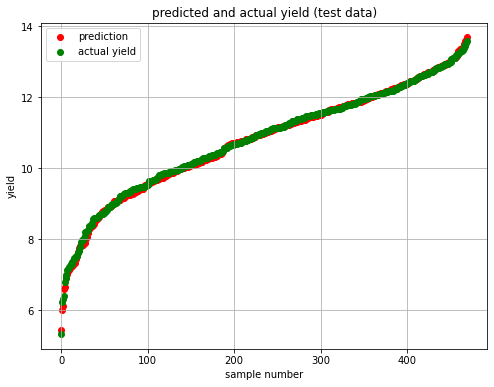

In [ ]:
import matplotlib.pyplot as plt
pred = model.predict(x_test)
pred_sorted = sorted(pred)
y_test_sorted = sorted(y_test.to_numpy())
fig, ax = plt.subplots(figsize=(8,6))
x = range(len(pred))
plt.scatter(x=x, y=pred_sorted, color="red")
plt.scatter(x=x, y=y_test_sorted, color="green")

ax.set_ylabel('yield')
ax.set_xlabel('sample number')
ax.set_title('predicted and actual yield (test data)')
ax.legend(['prediction', 'actual yield'])
ax.grid()
# plt.show()
#plt.xlim(0,10)


45/45 [==============================] - 0s 845us/step


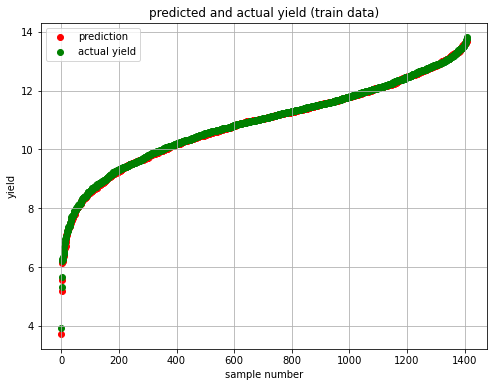

In [ ]:
pred = model.predict(x_train)
pred_sorted = sorted(pred)
y_train_sorted = sorted(y_train.to_numpy())
fig, ax = plt.subplots(figsize=(8,6))
x = range(len(pred))
plt.scatter(x=x, y=pred_sorted, color="red")
plt.scatter(x=x, y=y_train_sorted, color="green")

ax.set_ylabel('yield')
ax.set_xlabel('sample number')
ax.set_title('predicted and actual yield (train data)')
ax.legend(['prediction', 'actual yield'])
ax.grid()
# plt.show()
#plt.xlim(0,10)


In [ ]:
model.save("modell_1.h5")

In [ ]:
#max and min temperatures/irrigation for which the model is trained, when using other values the network might not give proper predictions (values were rounded up) 
min_temperature= 14
max_temperature= 35

min_irrigation = 2.0
max_irrigation = 6.1


#insert the df for evaluation given in the assignment (dummy df Values for country/pesticide were set to 0)       
data_cost_prediction = pd.DataFrame([[0, 278.5, 15, 0, 0],[0,426.0,22,0,0],[0,417.0,25,0,0]], 
                                    columns=["irrigation", "sun", "temperature", "Envidum_NED", "Glyfanac_ESP"])

#initialize a df for calculation and results
df_for_calculation = data_cost_prediction.copy()
df_results = pd.DataFrame()


#loop over temperature, used pesticide and irrigation, to get all the possible combinations
for temperature in range(min_temperature,max_temperature):
    for irrigation in np.arange(min_irrigation,max_irrigation,0.5):
        for Glyfanac_true in range(0,2):

            #reset pesticide variable
            Glyfanac=0
            Envidum=0
            
            #add respective temperature and irrigation in a temporary df
            df_work = data_cost_prediction.copy()
            df_work["temperature"] = temperature
            df_work["irrigation"] = irrigation
            
            # add one of either Glyfanac or Envidum
            if Glyfanac_true == 1:
                df_work["Glyfanac_ESP"] = 1
                Glyfanac = 1
            if Glyfanac_true == 0:
                df_work["Envidum_NED"] = 1 
                Envidum=1
            
            #predict what the yield will be using the temperature and irrigation and the model of task 2
            #transform values to scaling
            df_work = scaler.transform(df_work)
            predictions_per_sqm = model.predict(df_work)
            predictions_per_sqm= np.reshape(predictions_per_sqm,(3))


            #loop through the df with the prediction an calculate the total yield (yield per sqm * size)
            for index, prediction in enumerate(predictions_per_sqm):
                for size in range(1000,51000,1000):
                    total_yield = prediction*size

                    #add the results to a new dataframe containing also the input values of the neuronal network
                    df_work = pd.DataFrame(df_work, 
                                           columns=["irrigation", "sun", "temperature", "Envidum_NED", "Glyfanac_ESP"])
                    df_temp = pd.DataFrame([[irrigation, round(df_work.iloc[index]["sun"],8), temperature, size, total_yield, Envidum, Glyfanac]], 
                                           columns=["irrigation", "sun","temperature", "size", "total_yield", "Envidum_NED", "Glyfanac_ESP"])
                    df_results= pd.concat([df_results, df_temp], ignore_index=True)
df_results.head()
#df_for_calculation.describe()  

1/1 [==============================] - 0s 16ms/step


,irrigation,sun,temperature,size,total_yield,Envidum_NED,Glyfanac_ESP
0,2.0,0.303956,14,1000,7271.258354,1,0
1,2.0,0.303956,14,2000,14542.516708,1,0
2,2.0,0.303956,14,3000,21813.775063,1,0
3,2.0,0.303956,14,4000,29085.033417,1,0
4,2.0,0.303956,14,5000,36356.291771,1,0


In [ ]:
#get sun values, which function as keys for the cycle
# min and max is used because cycle 2 has lowest sun and cycle 3 highest sun
#50% quantile is used to get the middel value for cycle 4
print(df_results["sun"].unique())
sun_cycle2=df_results["sun"].unique().min() 
sun_cycle3=df_results["sun"].unique().max()
sun_cycle4=np.quantile(df_results["sun"].unique(),0.5)

[0.30395565 0.5375366  0.5232842 ]


In [ ]:


#adding factor list for different demand scenarios
factor_list =[0.8, 0.9, 1.1, 1.2,1]
#adding dfs for wip and results
df_sensitivity = pd.DataFrame()
df_sensitivity_work = df_results.copy()

for factor in factor_list:
    
    # adding the respective demand to the df
    df_sensitivity_work["demand"]=0
    df_sensitivity_work.loc[df_sensitivity_work["sun"]==sun_cycle2, "demand"] = 300000*factor
    df_sensitivity_work.loc[df_sensitivity_work["sun"]==sun_cycle3, "demand"] = 500000*factor
    df_sensitivity_work.loc[df_sensitivity_work["sun"]== sun_cycle4, "demand"] = 580000*factor
    
    #adding a scenario coloumn with values [0.8, 0.9, 1, 1.1, 1.2]
    df_sensitivity_work["scenario"]="na"
    df_sensitivity_work.loc[df_sensitivity_work["demand"]==300000*factor, "scenario"] = 1*factor
    df_sensitivity_work.loc[df_sensitivity_work["demand"]==500000*factor, "scenario"] = 1*factor
    df_sensitivity_work.loc[df_sensitivity_work["demand"]==580000*factor, "scenario"] = 1*factor
                   
    #calculating cost for underfulfilling demand
    df_sensitivity_work["cost_for_underfulfilling_demand"] = np.maximum((df_sensitivity_work["demand"] - df_sensitivity_work["total_yield"]),0)

    #calculating cost for temperature change
    df_sensitivity_work.loc[df_sensitivity_work["sun"]==sun_cycle2, "cost_for_temperature_change"] = abs(df_sensitivity_work["temperature"]-15)*3600
    df_sensitivity_work.loc[df_sensitivity_work["sun"]==sun_cycle3, "cost_for_temperature_change"] = abs(df_sensitivity_work["temperature"]-22)*3600
    df_sensitivity_work.loc[df_sensitivity_work["sun"]== sun_cycle4, "cost_for_temperature_change"] = abs(df_sensitivity_work["temperature"]-25)*3600

    #calculating irrigation cost
    #irrigation cost per day * 60 = irrigation cost for 1 cycle (2 months)
    # units has to be converted from l/(sqm*days) to cubicmeters
    df_sensitivity_work["cost_for_irrigation"] = df_sensitivity_work["irrigation"]*60* df_sensitivity_work["size"]/1000*0.021

    #1 year = 360 days
    #calculating costs for labour
    #one cycle = 2 months
    #20 EUR per year/sqm
    #20/6 EUR per cycle
    df_sensitivity_work["cost_for_labour"] = df_sensitivity_work["size"]* 20/6

    #adding sum of all cost per cycle
    df_sensitivity_work["sum_of_all_cost_per_cycle"] = df_sensitivity_work["cost_for_underfulfilling_demand"] + df_sensitivity_work["cost_for_temperature_change"] + df_sensitivity_work["cost_for_irrigation"] + df_sensitivity_work["cost_for_labour"]
    
    
    #getting the minimal cost for cylce 2
    min_cycle2= df_sensitivity_work.loc[df_sensitivity_work["sun"]==sun_cycle2]["sum_of_all_cost_per_cycle"].min()
    df_temp1 = df_sensitivity_work.loc[df_sensitivity_work["sun"]==sun_cycle2].loc[df_sensitivity_work["sum_of_all_cost_per_cycle"]==min_cycle2]
    #adding the minimal cost to a df
    df_sensitivity= pd.concat([df_sensitivity, df_temp1], ignore_index=True)

    #getting the minimal cost for cylce 3
    min_cycle3= df_sensitivity_work.loc[df_sensitivity_work["sun"]==sun_cycle3]["sum_of_all_cost_per_cycle"].min()
    df_temp1 = df_sensitivity_work.loc[df_sensitivity_work["sun"]==sun_cycle3].loc[df_sensitivity_work["sum_of_all_cost_per_cycle"]==min_cycle3]
    #adding the minimal cost to a df
    df_sensitivity= pd.concat([df_sensitivity, df_temp1], ignore_index=True)


    #getting the minimal cost for cylce 4
    min_cycle4= df_sensitivity_work.loc[df_sensitivity_work["sun"]== sun_cycle4]["sum_of_all_cost_per_cycle"].min()
    df_temp1 = df_sensitivity_work.loc[df_sensitivity_work["sun"]== sun_cycle4].loc[df_sensitivity_work["sum_of_all_cost_per_cycle"]==min_cycle4]
    #adding the minimal cost to a df
    df_sensitivity= pd.concat([df_sensitivity, df_temp1], ignore_index=True)
    


In [ ]:
df_sensitivity

,irrigation,sun,temperature,size,total_yield,Envidum_NED,Glyfanac_ESP,demand,scenario,cost_for_underfulfilling_demand,cost_for_temperature_change,cost_for_irrigation,cost_for_labour,sum_of_all_cost_per_cycle
0,3.5,0.303956,15,22000,238304.309845,0,1,240000,0.8,1695.690155,0.0,97.02,73333.333333,75126.043488
1,3.5,0.537537,22,32000,398564.575195,0,1,400000,0.8,1435.424805,0.0,141.12,106666.666667,108243.211471
2,3.5,0.523284,23,38000,462510.339737,0,1,464000,0.8,1489.660263,7200.0,167.58,126666.666667,135523.906930
3,3.5,0.303956,15,25000,270800.352097,0,1,270000,0.9,0.000000,0.0,110.25,83333.333333,83443.583333
4,3.5,0.537537,22,36000,448385.147095,0,1,450000,0.9,1614.852905,0.0,158.76,120000.000000,121773.612905
5,3.5,0.523284,23,43000,523366.963387,0,1,522000,0.9,0.000000,7200.0,189.63,143333.333333,150722.963333
6,3.5,0.303956,16,29000,327451.898575,0,1,330000,1.1,2548.101425,3600.0,127.89,96666.666667,102942.658092
7,3.5,0.537537,22,44000,548026.290894,0,1,550000,1.1,1973.709106,0.0,194.04,146666.666667,148834.415773
8,3.5,0.523284,21,50000,633151.531219,0,1,638000,1.1,4848.468781,14400.0,220.50,166666.666667,186135.635447
9,3.5,0.303956,16,32000,361326.232910,0,1,360000,1.2,0.000000,3600.0,141.12,106666.666667,110407.786667


In [ ]:
    df_sensitivity["cycle"]=0
    df_sensitivity.loc[df_sensitivity["sun"]==sun_cycle2, "cycle"] = 2
    df_sensitivity.loc[df_sensitivity["sun"]==sun_cycle3, "cycle"] = 3
    df_sensitivity.loc[df_sensitivity["sun"]== sun_cycle4, "cycle"] = 4

In [ ]:
df_sensitivity.sort_values("cycle")

,irrigation,sun,temperature,size,total_yield,Envidum_NED,Glyfanac_ESP,demand,scenario,cost_for_underfulfilling_demand,cost_for_temperature_change,cost_for_irrigation,cost_for_labour,sum_of_all_cost_per_cycle,cycle
0,3.5,0.303956,15,22000,238304.309845,0,1,240000,0.8,1695.690155,0.0,97.02,73333.333333,75126.043488,2
3,3.5,0.303956,15,25000,270800.352097,0,1,270000,0.9,0.000000,0.0,110.25,83333.333333,83443.583333,2
6,3.5,0.303956,16,29000,327451.898575,0,1,330000,1.1,2548.101425,3600.0,127.89,96666.666667,102942.658092,2
9,3.5,0.303956,16,32000,361326.232910,0,1,360000,1.2,0.000000,3600.0,141.12,106666.666667,110407.786667,2
12,3.5,0.303956,15,28000,303296.394348,0,1,300000,1,0.000000,0.0,123.48,93333.333333,93456.813333,2
1,3.5,0.537537,22,32000,398564.575195,0,1,400000,0.8,1435.424805,0.0,141.12,106666.666667,108243.211471,3
4,3.5,0.537537,22,36000,448385.147095,0,1,450000,0.9,1614.852905,0.0,158.76,120000.000000,121773.612905,3
7,3.5,0.537537,22,44000,548026.290894,0,1,550000,1.1,1973.709106,0.0,194.04,146666.666667,148834.415773,3
10,3.5,0.537537,22,48000,597846.862793,0,1,600000,1.2,2153.137207,0.0,211.68,160000.000000,162364.817207,3
13,3.5,0.537537,22,40000,498205.718994,0,1,500000,1,1794.281006,0.0,176.40,133333.333333,135304.014339,3


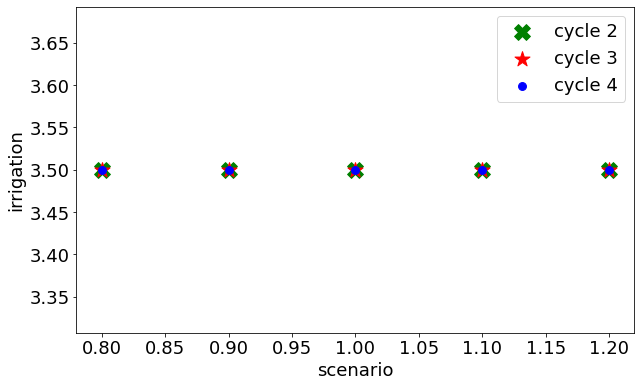

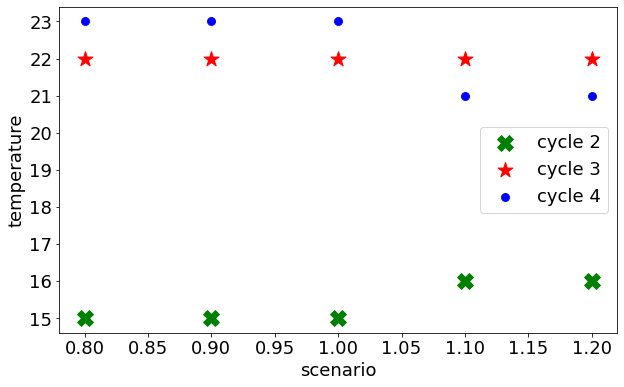

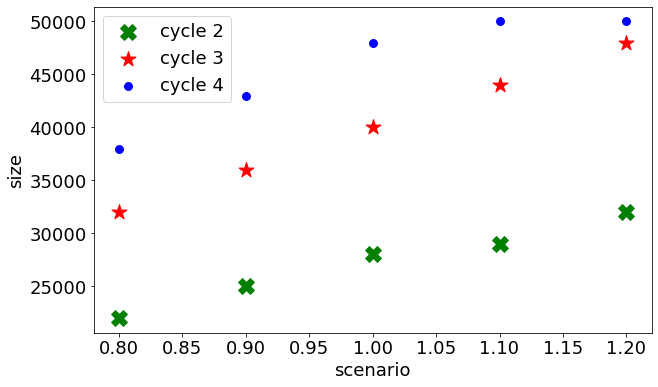

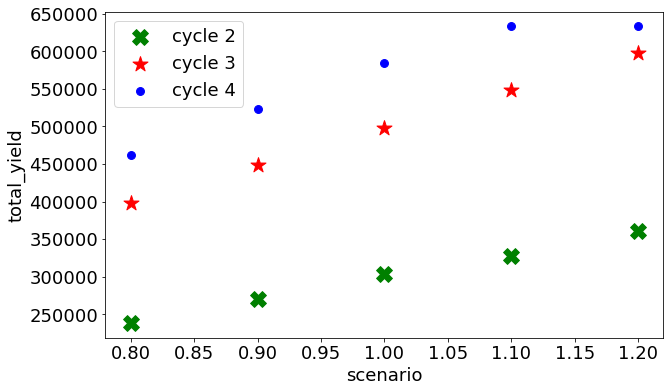

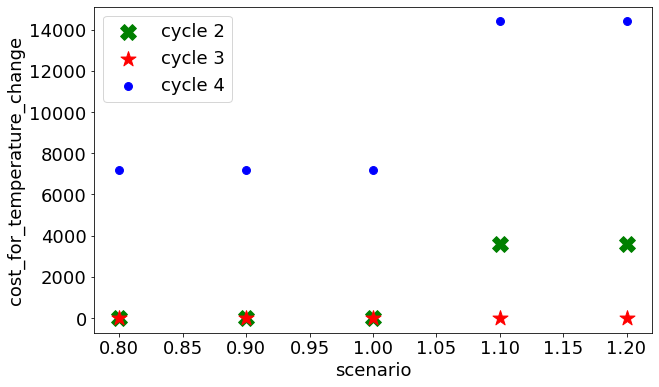

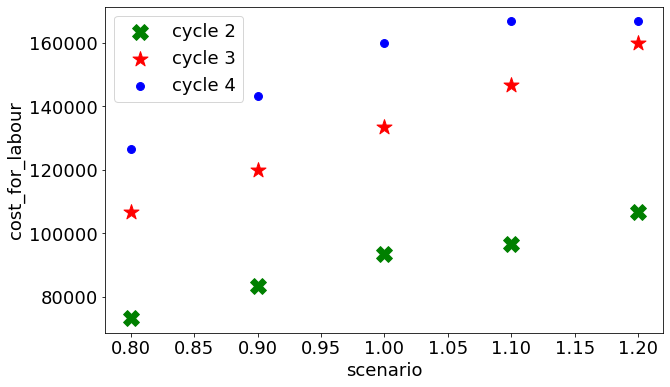

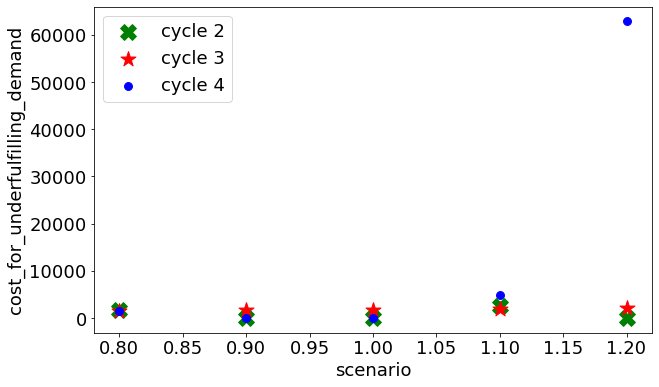

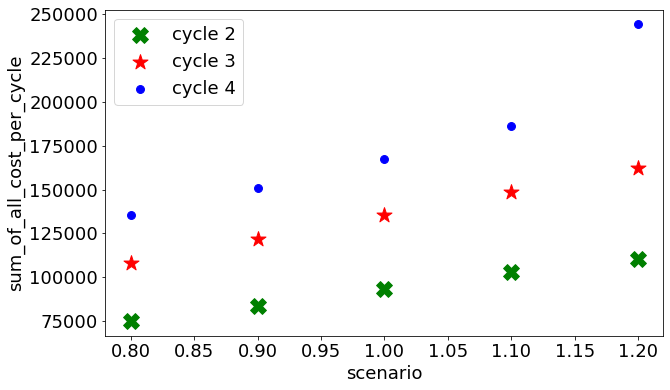

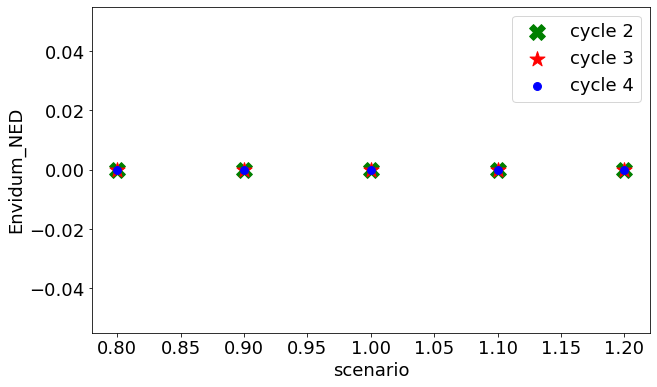

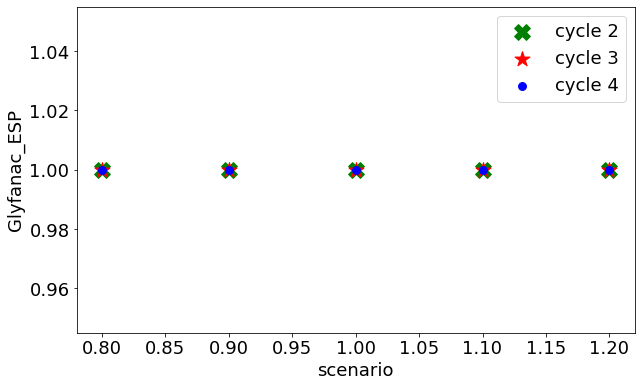

In [ ]:
feature_list = ["irrigation", "temperature", "size", "total_yield", "cost_for_temperature_change", "cost_for_labour", "cost_for_underfulfilling_demand", "sum_of_all_cost_per_cycle", "Envidum_NED", "Glyfanac_ESP"]
for feature in feature_list:

    fig, ax = plt.subplots(figsize=(10,6))



    df_sensitivity.groupby('cycle').get_group(2).plot.scatter('scenario', feature, 
                                                                 color= "green",label="cycle 2", ax=ax, marker="X", s=250)
    df_sensitivity.groupby('cycle').get_group(3).plot.scatter('scenario', feature, 
                                                                 color="red",label="cycle 3", ax=ax, marker="*", s=250)
    
    df_sensitivity.groupby('cycle').get_group(4).plot.scatter('scenario', feature, 
                                                                 color="blue",label="cycle 4", ax=ax, marker=".", s=250)

    plt.show()

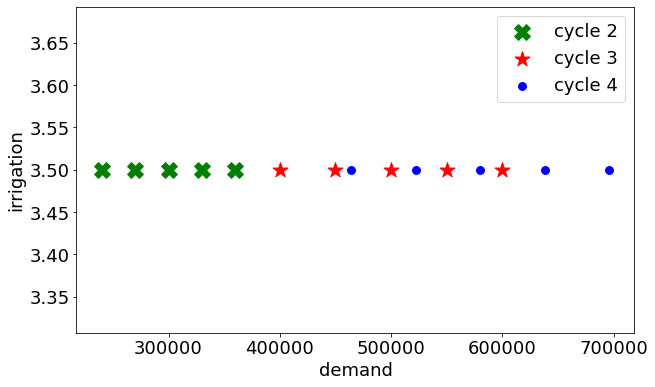

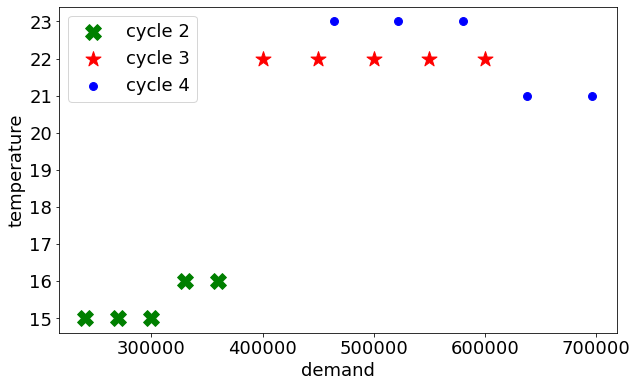

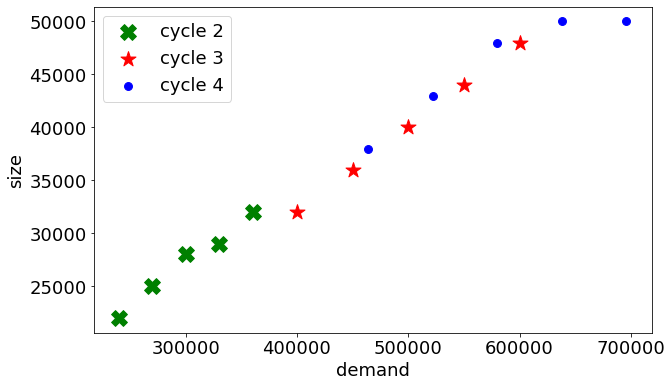

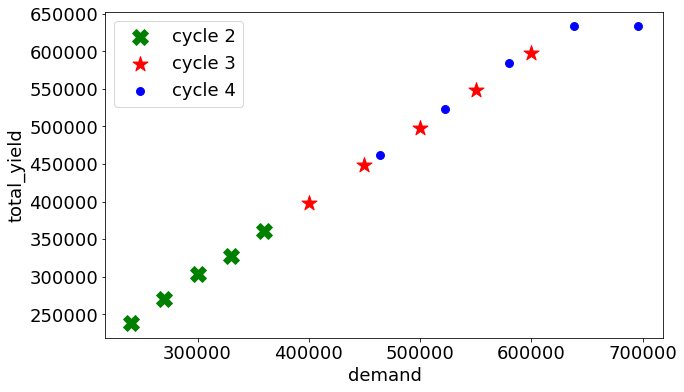

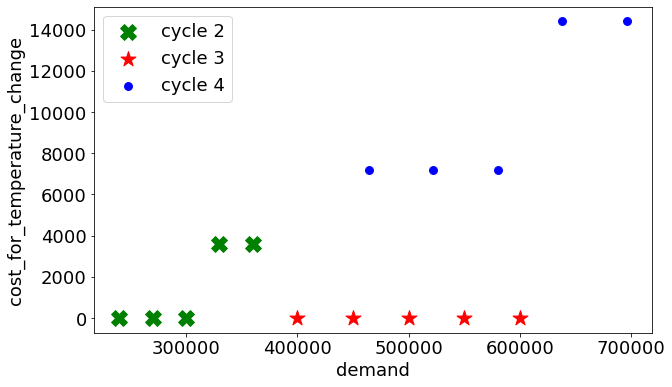

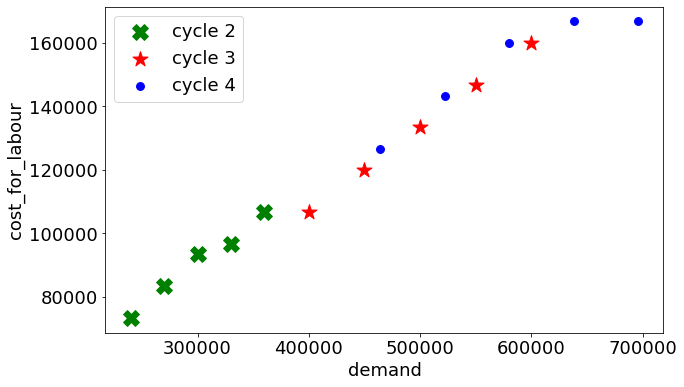

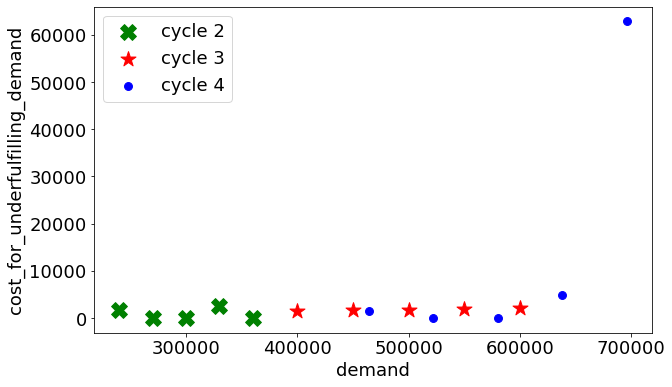

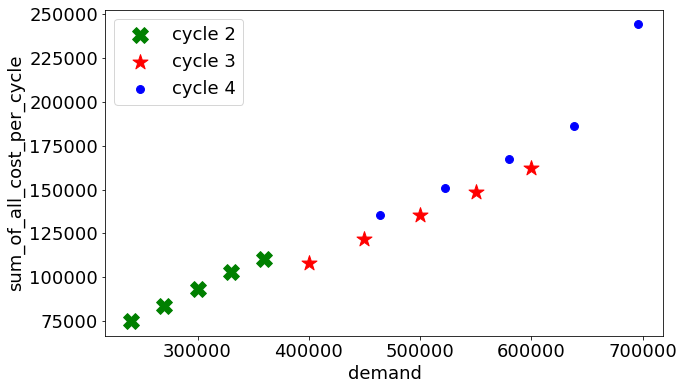

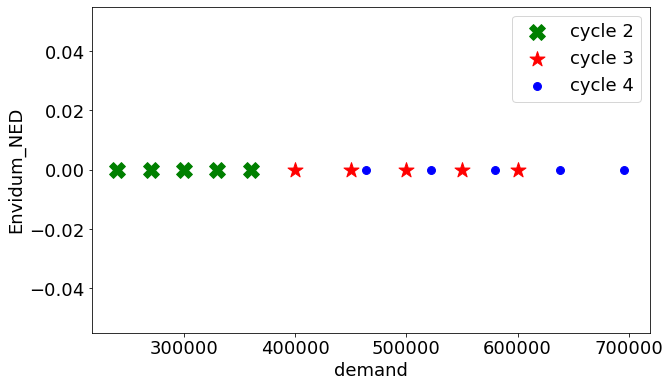

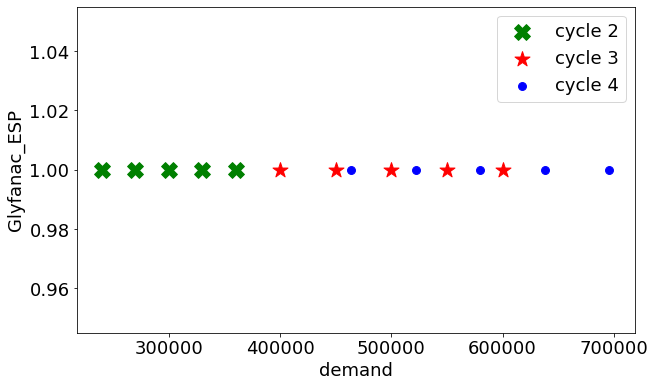

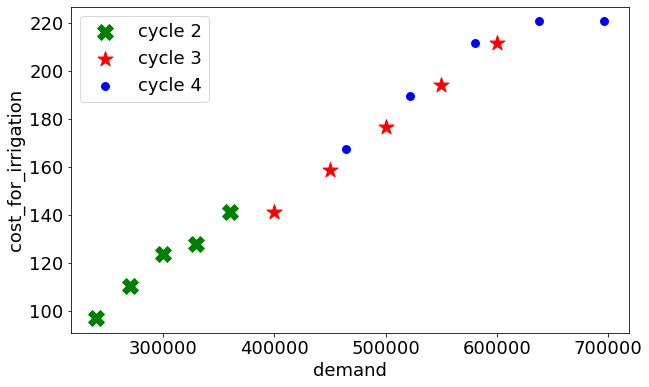

In [ ]:
feature_list = ["irrigation", "temperature", "size", "total_yield", "cost_for_temperature_change", "cost_for_labour", "cost_for_underfulfilling_demand", "sum_of_all_cost_per_cycle", "Envidum_NED", "Glyfanac_ESP", "cost_for_irrigation"]
for feature in feature_list:

    fig, ax = plt.subplots(figsize=(10,6))



    df_sensitivity.groupby('cycle').get_group(2).plot.scatter('demand', feature, 
                                                                 color= "green",label="cycle 2", ax=ax, marker="X", s=250)
    df_sensitivity.groupby('cycle').get_group(3).plot.scatter('demand', feature, 
                                                                 color="red",label="cycle 3", ax=ax, marker="*", s=250)
    
    df_sensitivity.groupby('cycle').get_group(4).plot.scatter('demand', feature, 
                                                                 color="blue",label="cycle 4", ax=ax, marker=".", s=250)

    plt.show()

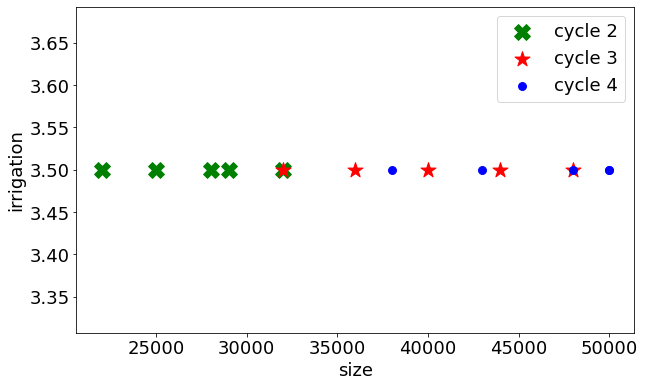

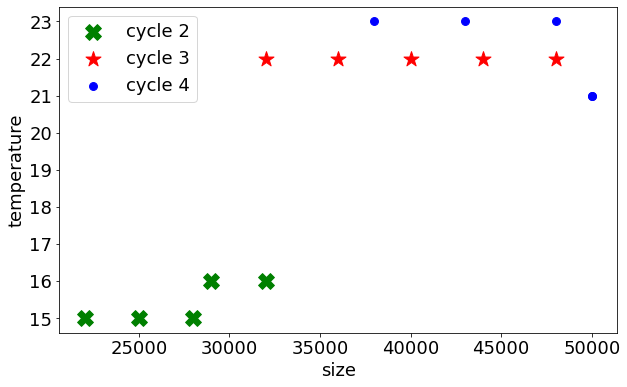

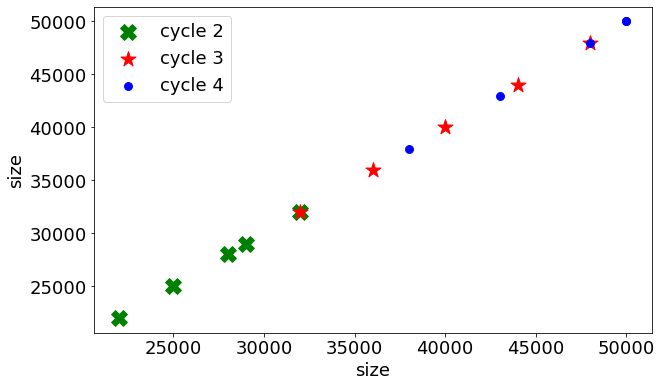

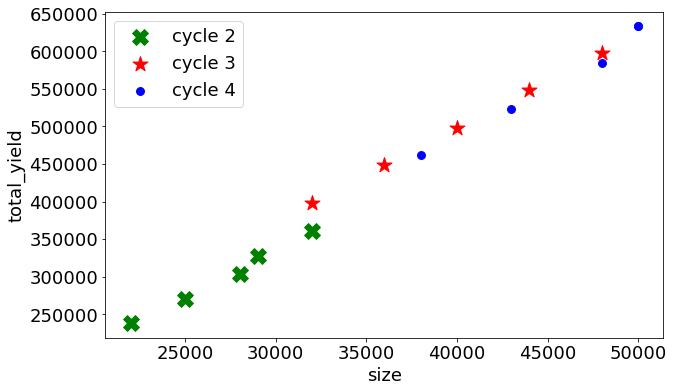

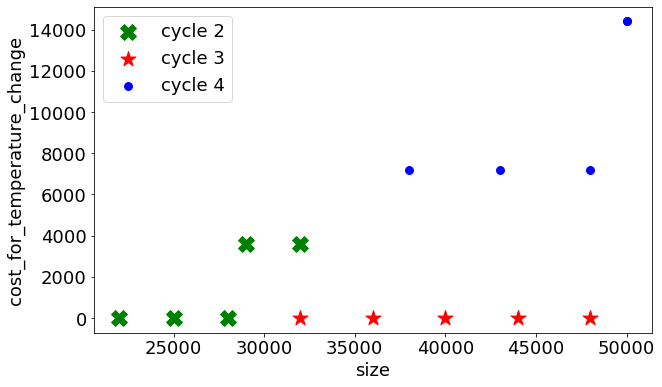

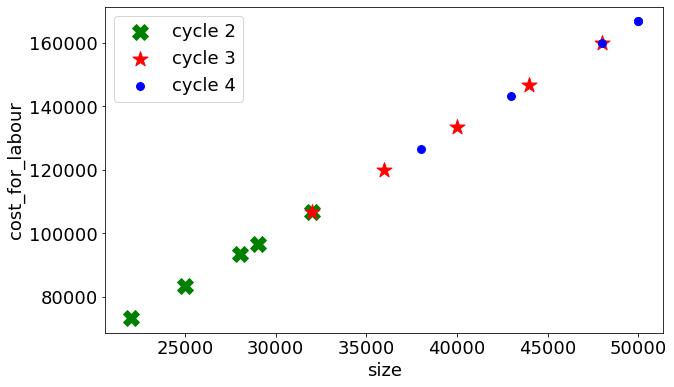

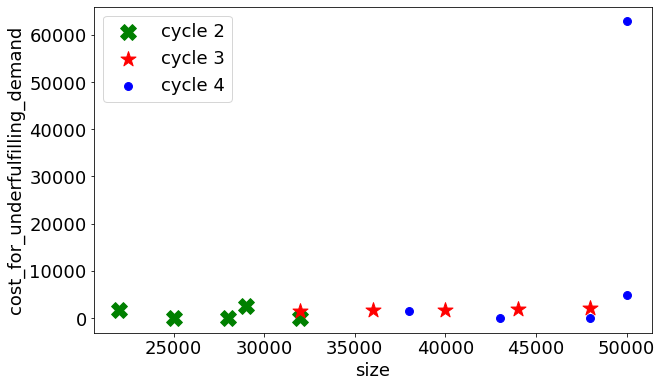

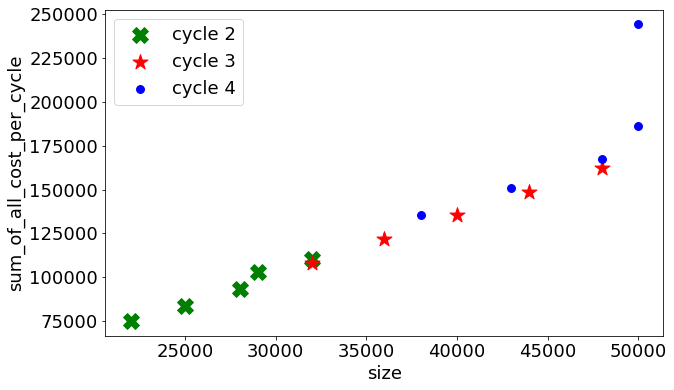

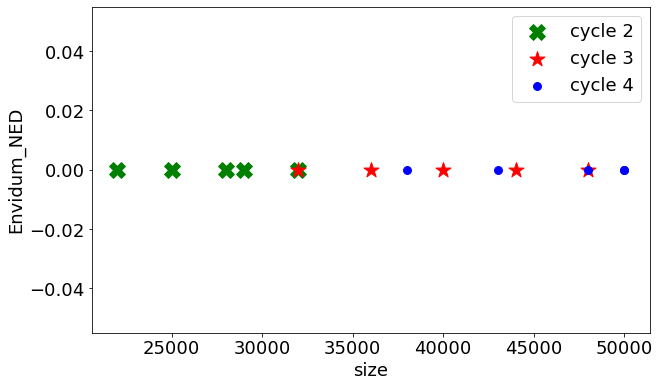

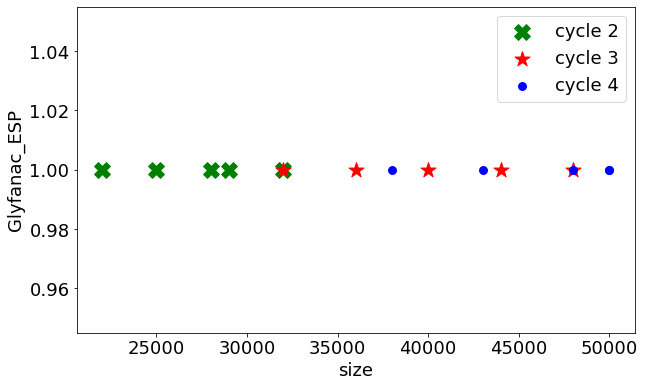

In [ ]:

feature_list = ["irrigation", "temperature", "size", "total_yield", "cost_for_temperature_change", "cost_for_labour", "cost_for_underfulfilling_demand", "sum_of_all_cost_per_cycle", "Envidum_NED", "Glyfanac_ESP"]
for feature in feature_list:


    fig, ax = plt.subplots(figsize=(10,6))



    df_sensitivity.groupby('cycle').get_group(2).plot.scatter('size', feature, 
                                                                 color= "green",label="cycle 2", ax=ax, marker="X", s=250)
    df_sensitivity.groupby('cycle').get_group(3).plot.scatter('size', feature, 
                                                                 color="red",label="cycle 3", ax=ax, marker="*", s=250)
    
    df_sensitivity.groupby('cycle').get_group(4).plot.scatter('size', feature, 
                                                                 color="blue",label="cycle 4", ax=ax, marker=".", s=250)

    plt.show()

In [ ]:
#best combinations for scenario with the expected demand
df_optimal_cost=df_sensitivity.groupby('scenario').get_group(1)
df_optimal_cost.sort_values("cycle").iloc[0][]

irrigation                              3.5
sun                                0.303956
temperature                              15
size                                  28000
total_yield                          303296
Envidum_NED                               0
Glyfanac_ESP                              1
demand                               300000
scenario                                  1
cost_for_underfulfilling_demand           0
cost_for_temperature_change               0
cost_for_irrigation                  123.48
cost_for_labour                     93333.3
sum_of_all_cost_per_cycle           93456.8
cycle                                     2
Name: 12, dtype: object

In [ ]:
df_optimal_cost

,irrigation,sun,temperature,size,total_yield,Envidum_NED,Glyfanac_ESP,demand,scenario,cost_for_underfulfilling_demand,cost_for_temperature_change,cost_for_irrigation,cost_for_labour,sum_of_all_cost_per_cycle,cycle
12,3.5,0.303956,15,28000,303296.394348,0,1,300000,1,0.000000,0.0,123.48,93333.333333,93456.813333,2
13,3.5,0.537537,22,40000,498205.718994,0,1,500000,1,1794.281006,0.0,176.40,133333.333333,135304.014339,3
14,3.5,0.523284,23,48000,584223.587036,0,1,580000,1,0.000000,7200.0,211.68,160000.000000,167411.680000,4


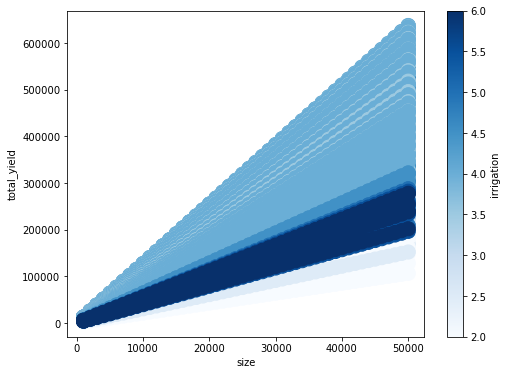

In [ ]:
plt.figure(figsize=(8,6))

scatter=plt.scatter(df_sensitivity_work["size"], df_sensitivity_work["total_yield"],s=200, c=df_results.irrigation, cmap="Blues", alpha=1)
plt.xlabel("size")
plt.ylabel("total_yield")

plt.colorbar(label="irrigation")



#df_sensitivity_work.plot.scatter("size", "total_yield", c=df_results.temperature, cmap="coolwarm")
#df_sensitivity_work.plot.scatter("sum_of_all_cost_per_cycle", "total_yield", c=df_results.temperature, cmap="YlGnBu")


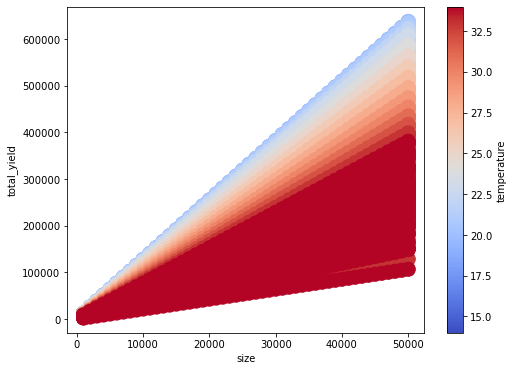

In [ ]:
plt.figure(figsize=(8,6))

scatter=plt.scatter(df_sensitivity_work["size"], df_sensitivity_work["total_yield"],s=200, c=df_results.temperature, cmap="coolwarm",alpha=1)
plt.xlabel("size")
plt.ylabel("total_yield")

plt.colorbar(label="temperature")


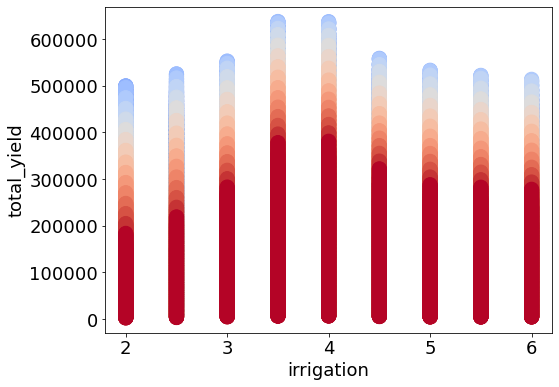

In [ ]:
plt.figure(figsize=(8,6))

scatter=plt.scatter(df_sensitivity_work["irrigation"], df_sensitivity_work["total_yield"],s=200, c=df_results.temperature, cmap="coolwarm")
plt.xlabel("irrigation")
plt.ylabel("total_yield")
plt.colorbar(label=color_variable)


# plt.colorbar(label="temperature"
plt.savefig("temp_irrigation")

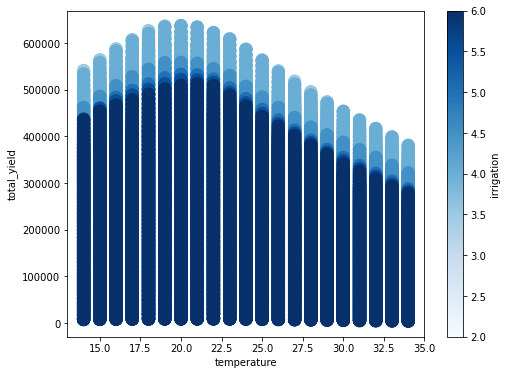

In [ ]:
plt.figure(figsize=(8,6))

scatter=plt.scatter(df_sensitivity_work["temperature"], df_sensitivity_work["total_yield"],s=150, c=df_results.irrigation, cmap="Blues")
plt.xlabel("temperature")
plt.ylabel("total_yield")

plt.colorbar(label="irrigation")

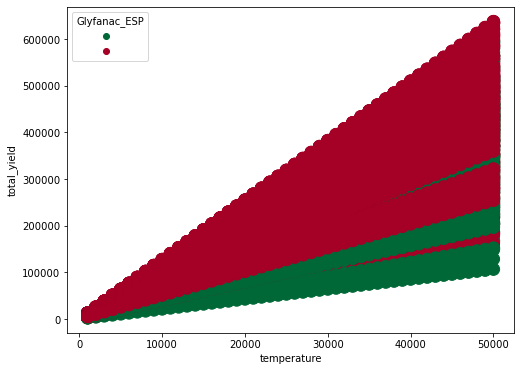

In [ ]:
plt.figure(figsize=(8,6))

scatter=plt.scatter(df_sensitivity_work["size"], df_sensitivity_work["total_yield"],s=150, c=df_results.Glyfanac_ESP, cmap="RdYlGn_r")
plt.xlabel("temperature")
plt.ylabel("total_yield")
plt.legend(handles=scatter.legend_elements()[0], 
           title="Glyfanac_ESP")



<AxesSubplot:xlabel='sun', ylabel='total_yield'>

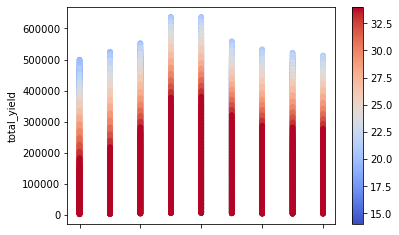

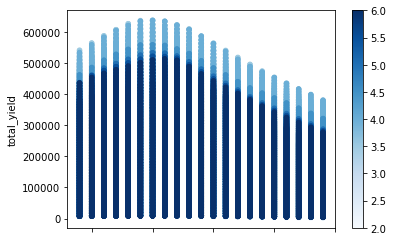

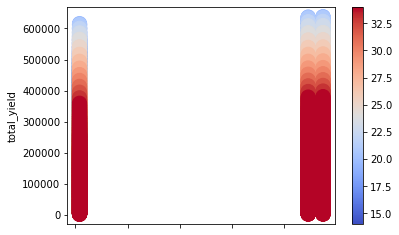

In [ ]:
df_sensitivity_work.plot.scatter("irrigation", "total_yield", c=df_results.temperature, cmap="coolwarm")
df_sensitivity_work.plot.scatter("temperature", "total_yield", c=df_results.irrigation, cmap="Blues")
df_sensitivity_work.plot.scatter("sun", "total_yield", c=df_results.temperature,s=200, cmap="coolwarm")


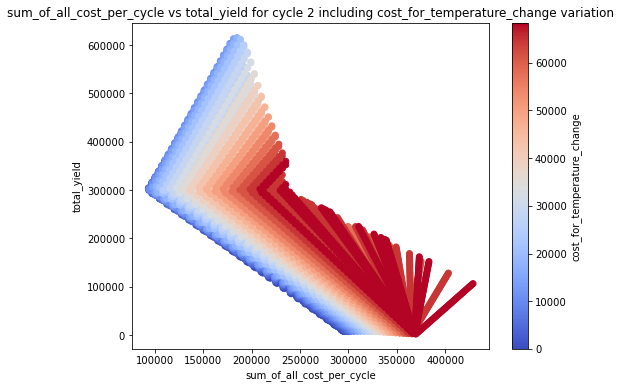

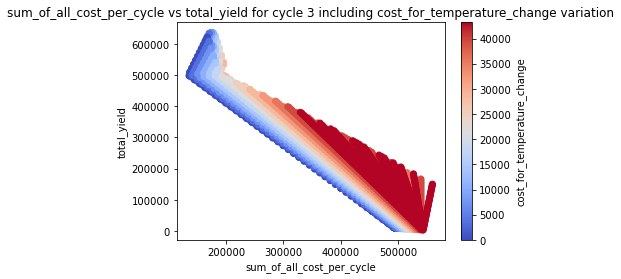

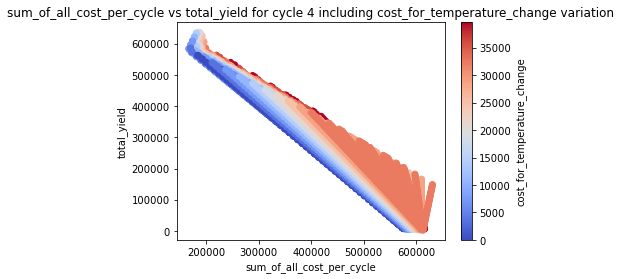

In [ ]:
plt.figure(figsize=(8,6))

x="sum_of_all_cost_per_cycle"
y="total_yield"
color_variable= "cost_for_temperature_change"
color_mapping="coolwarm"

demand_list = [300000,500000, 580000]
countcycle=2
for cycle in demand_list:
    to_plot=df_sensitivity_work.groupby('demand').get_group(cycle)
    plt.scatter(to_plot[x], to_plot[y],marker = "o", 
                                                                 c=df_sensitivity_work.groupby('demand').get_group(cycle)[color_variable], cmap=color_mapping,
                                                        label=f"{countcycle}. cycle")
    plt.title(f"{x} vs {y} for cycle {countcycle} including {color_variable} variation" )
    plt.colorbar(label=color_variable)
    plt.xlabel(x)
    plt.ylabel(y)
    countcycle=countcycle+1
    plt.show()


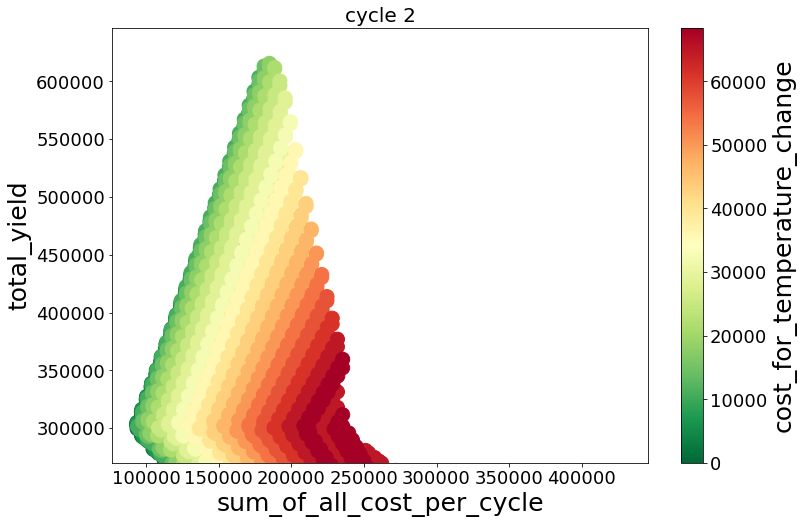

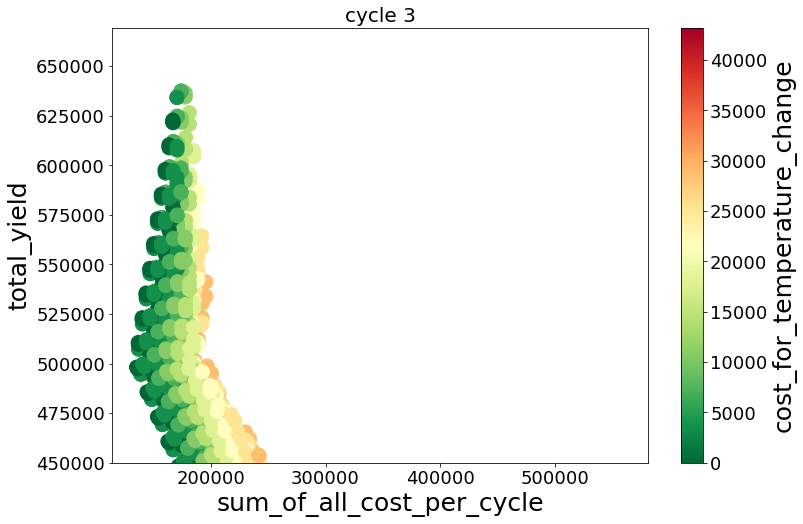

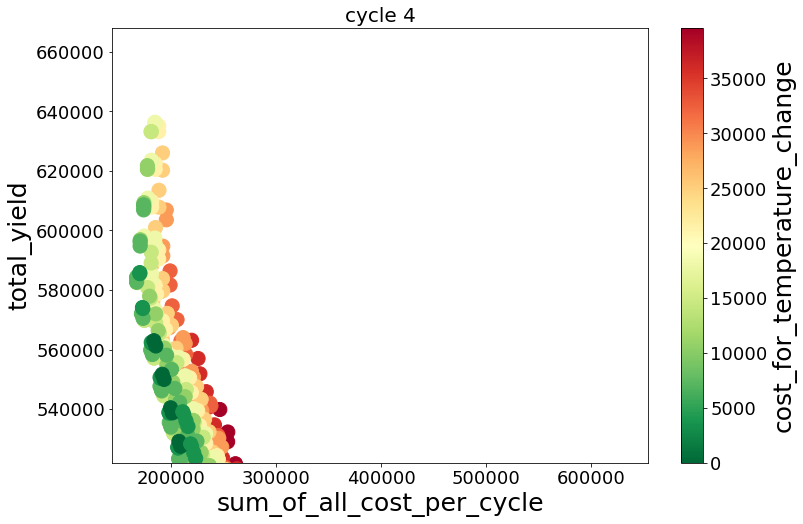

In [ ]:

x="sum_of_all_cost_per_cycle"
y="total_yield"
color_variable= "cost_for_temperature_change"
color_mapping="RdYlGn_r"
plt.rc('axes', titlesize=20)



demand_list = [300000,500000, 580000]
countcycle=2
for cycle in demand_list:
    plt.figure(figsize=(12,8))

    to_plot=df_sensitivity_work.groupby('demand').get_group(cycle)
    plt.scatter(to_plot[x], to_plot[y],marker = "o", 
                                                                 c=df_sensitivity_work.groupby('demand').get_group(cycle)[color_variable], cmap=color_mapping,
                                                        label=f"{countcycle}. cycle", s=200)
    
    df_optimal_cost
    plt.title(f"cycle {countcycle}")

    plt.colorbar().set_label(label=color_variable ,size=25)
    #plt.scatter(df_optimal_cost.sort_values("cycle").iloc[countcycle-2][x],df_optimal_cost.sort_values("cycle").iloc[countcycle-2][y], color="black", s=200)

    plt.xlabel(x, fontsize=25)
    plt.ylabel(y, fontsize=25)
    plt.ylim((cycle*0.9))
    countcycle=countcycle+1
    plt.show()
    
    


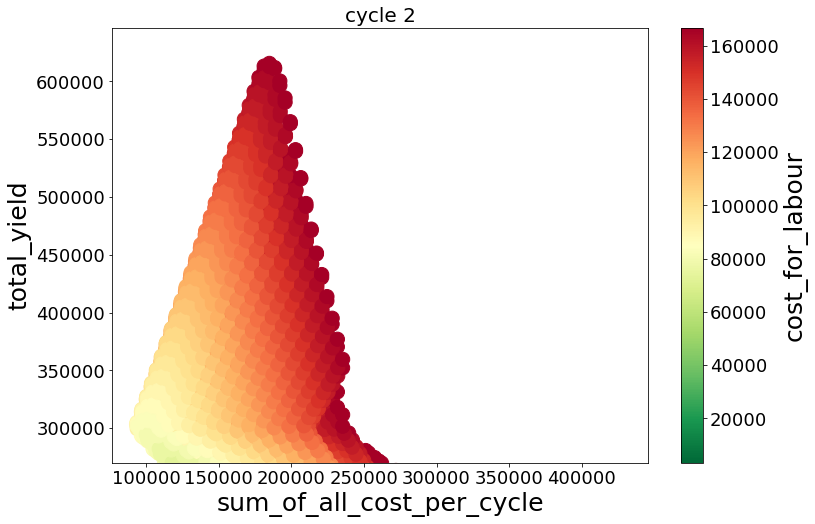

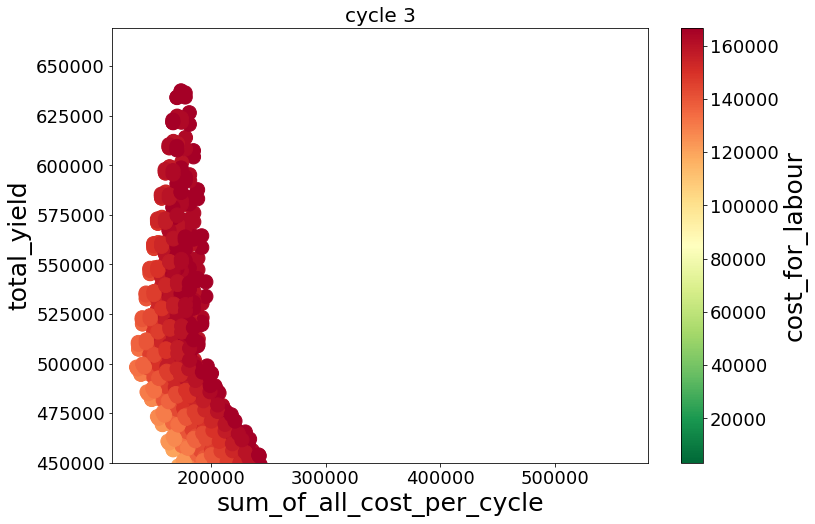

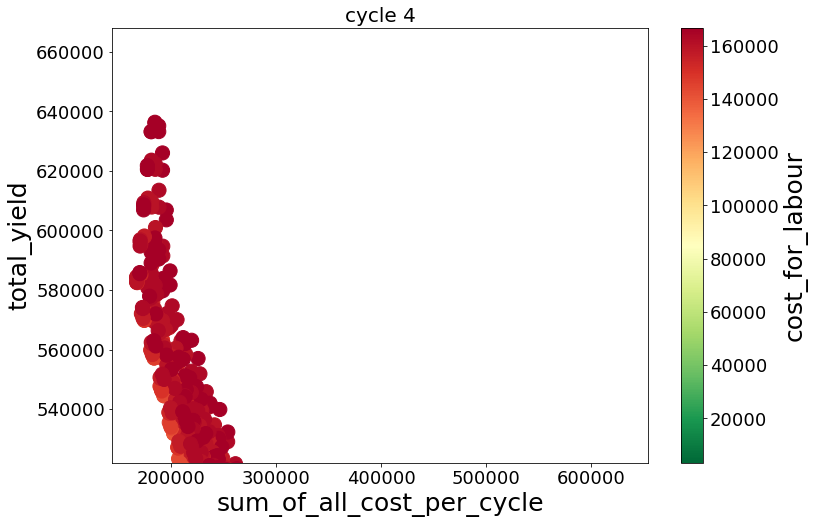

In [ ]:
x="sum_of_all_cost_per_cycle"
y="total_yield"
color_variable= "cost_for_labour"
color_mapping="RdYlGn_r"


demand_list = [300000,500000, 580000]
countcycle=2
for cycle in demand_list:
    plt.figure(figsize=(12,8))

    to_plot=df_sensitivity_work.groupby('demand').get_group(cycle)
    plt.scatter(to_plot[x], to_plot[y],marker = "o", 
                                                                 c=df_sensitivity_work.groupby('demand').get_group(cycle)[color_variable], cmap=color_mapping,
                                                        label=f"{countcycle}. cycle", s=200)
    
    df_optimal_cost
    plt.title(f"cycle {countcycle}")

    plt.colorbar().set_label(label=color_variable ,size=25)
    #plt.scatter(df_optimal_cost.sort_values("cycle").iloc[countcycle-2][x],df_optimal_cost.sort_values("cycle").iloc[countcycle-2][y], color="black", s=200)

    plt.xlabel(x, fontsize=25)
    plt.ylabel(y, fontsize=25)
    plt.ylim((cycle*0.9))
    countcycle=countcycle+1
    plt.show()
    
    

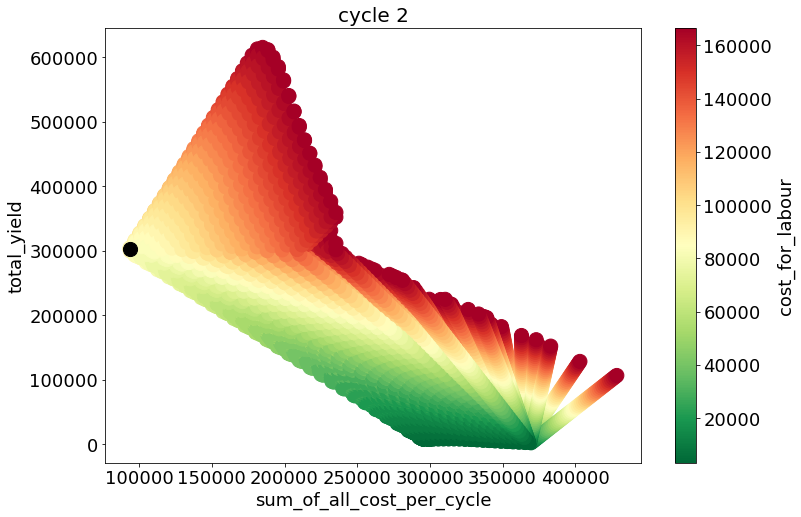

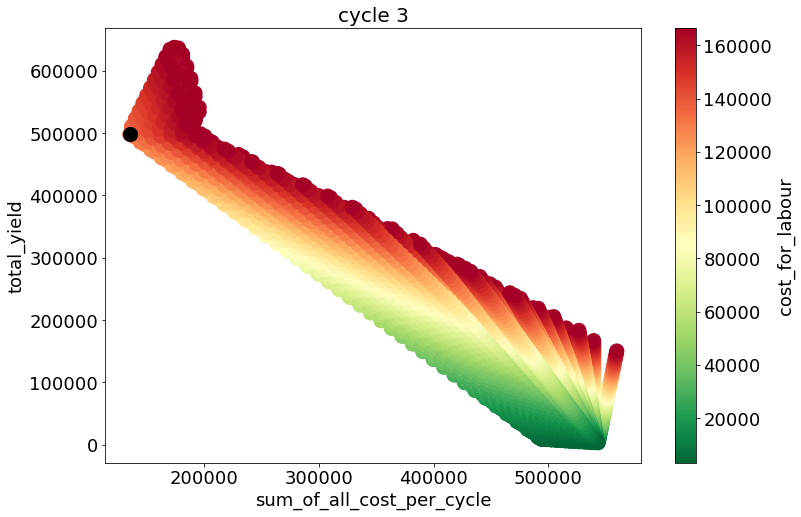

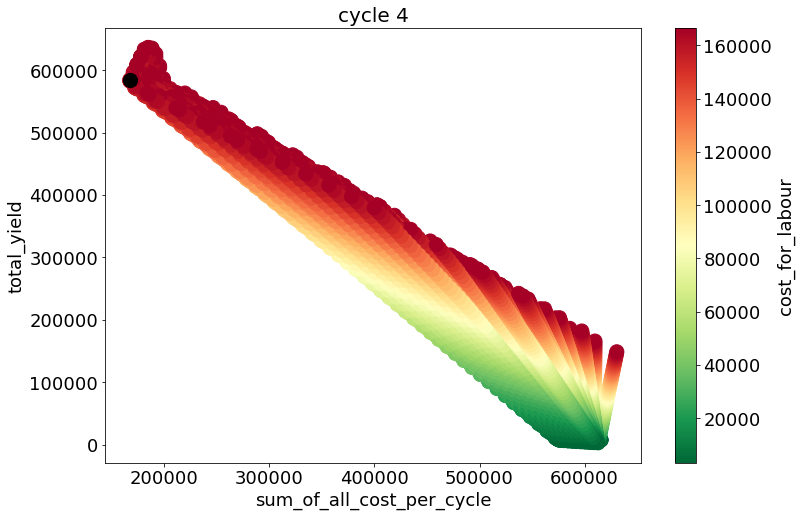

In [ ]:
x="sum_of_all_cost_per_cycle"
y="total_yield"
color_variable= "cost_for_labour"
color_mapping="RdYlGn_r"


demand_list = [300000,500000, 580000]
countcycle=2
for cycle in demand_list:
    plt.figure(figsize=(12,8))

    to_plot=df_sensitivity_work.groupby('demand').get_group(cycle)
    plt.scatter(to_plot[x], to_plot[y],marker = "o", 
                                                                 c=df_sensitivity_work.groupby('demand').get_group(cycle)[color_variable], cmap=color_mapping,
                                                        label=f"{countcycle}. cycle",s=200)
    
    
    
    plt.colorbar(label=color_variable)

    
    #df_optimal_cost.sort_values("cycle").iloc[countcycle-2].plot.scatter(x, y, marker="X", ax=ax, color="black")
    plt.scatter(df_optimal_cost.sort_values("cycle").iloc[countcycle-2][x],df_optimal_cost.sort_values("cycle").iloc[countcycle-2][y], color="black", s=200)
    
    
    plt.title(f"cycle {countcycle}" )
    plt.xlabel(x)
    plt.ylabel(y)
    countcycle=countcycle+1
    plt.show()

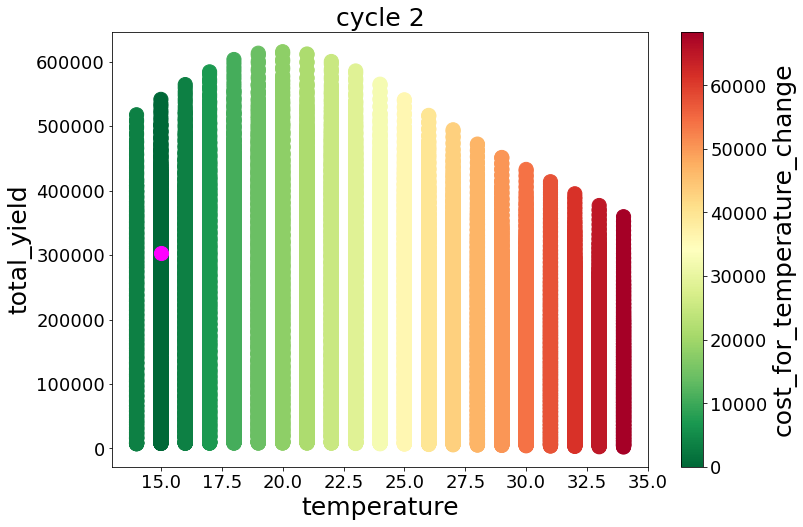

<Figure size 432x288 with 0 Axes>

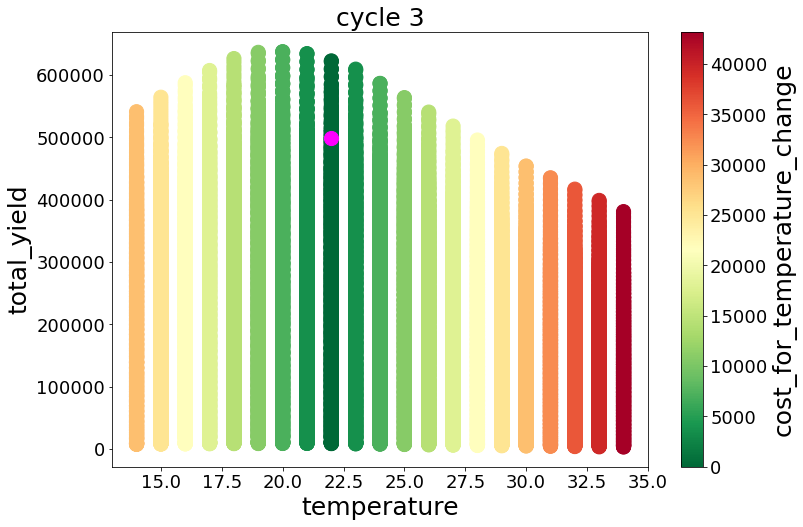

<Figure size 432x288 with 0 Axes>

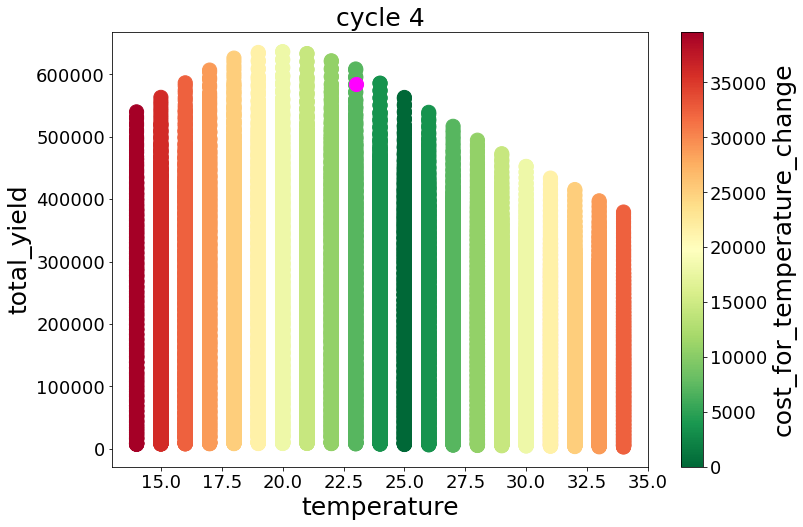

<Figure size 432x288 with 0 Axes>

In [ ]:
x="temperature"
y="total_yield"
color_variable= "cost_for_temperature_change"
color_mapping="RdYlGn_r"


demand_list = [300000,500000, 580000]
countcycle=2
for cycle in demand_list:
    plt.figure(figsize=(12,8))

    to_plot=df_sensitivity_work.groupby('demand').get_group(cycle)
    plt.scatter(to_plot[x], to_plot[y],marker = "o", 
                                                                 c=df_sensitivity_work.groupby('demand').get_group(cycle)[color_variable], cmap=color_mapping,
                                                        label=f"{countcycle}. cycle",s=200)
    
    
    
    plt.colorbar().set_label(label=color_variable ,size=25)

    
    #df_optimal_cost.sort_values("cycle").iloc[countcycle-2].plot.scatter(x, y, marker="X", ax=ax, color="black")
    plt.scatter(df_optimal_cost.sort_values("cycle").iloc[countcycle-2][x],df_optimal_cost.sort_values("cycle").iloc[countcycle-2][y], color="magenta", s=200)
    
    
    plt.title(f"cycle {countcycle}", size=25 )
    plt.xlabel(x, fontsize=25)
    plt.ylabel(y, fontsize=25)
    countcycle=countcycle+1
    plt.show()
    plt.savefig(f"cycle {countcycle}")

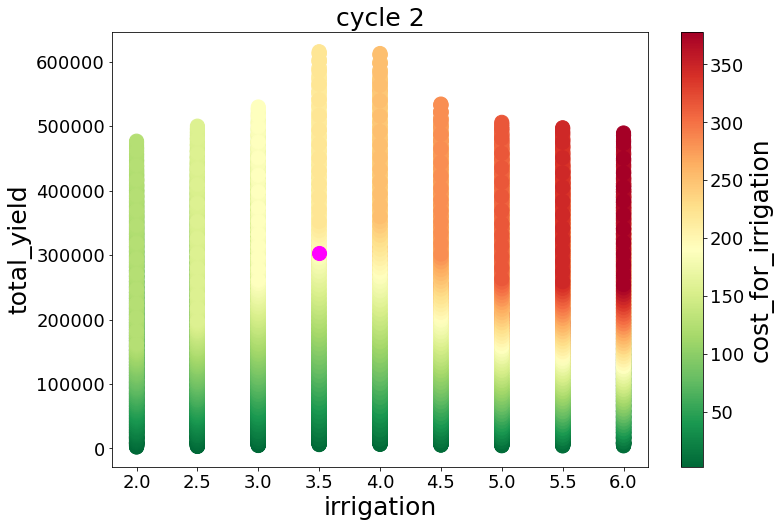

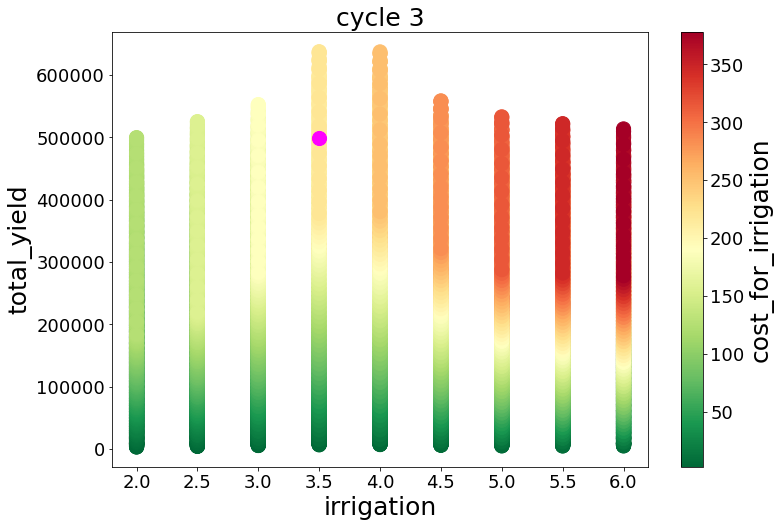

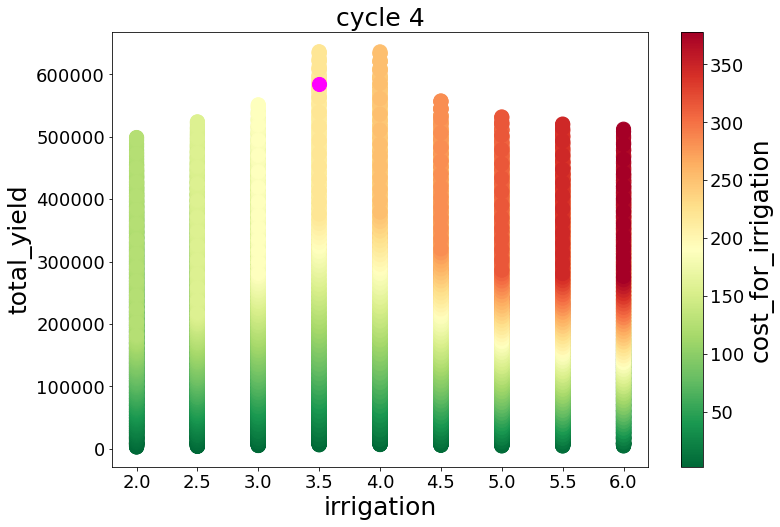

In [ ]:
x="irrigation"
y="total_yield"
color_variable= "cost_for_irrigation"
color_mapping="RdYlGn_r"


demand_list = [300000,500000, 580000]
countcycle=2
for cycle in demand_list:
    plt.figure(figsize=(12,8))

    to_plot=df_sensitivity_work.groupby('demand').get_group(cycle)
    plt.scatter(to_plot[x], to_plot[y],marker = "o", 
                                                                 c=df_sensitivity_work.groupby('demand').get_group(cycle)[color_variable], cmap=color_mapping,
                                                        label=f"{countcycle}. cycle",s=200)
    
    
    
    plt.colorbar().set_label(label=color_variable ,size=25)

    
    #df_optimal_cost.sort_values("cycle").iloc[countcycle-2].plot.scatter(x, y, marker="X", ax=ax, color="black")
    plt.scatter(df_optimal_cost.sort_values("cycle").iloc[countcycle-2][x],df_optimal_cost.sort_values("cycle").iloc[countcycle-2][y], color="magenta", s=200)
    
    
    plt.title(f"cycle {countcycle}", size=25 )
    plt.xlabel(x, fontsize=25)
    plt.ylabel(y, fontsize=25)
    countcycle=countcycle+1
    plt.show()

In [ ]:
df_sensitivity_work

,irrigation,sun,temperature,size,total_yield,Envidum_NED,Glyfanac_ESP,demand,scenario,cost_for_underfulfilling_demand,cost_for_temperature_change,cost_for_irrigation,cost_for_labour,sum_of_all_cost_per_cycle
0,2.0,0.303956,14,1000,7271.258354,1,0,300000,1,292728.741646,3600.0,2.52,3333.333333,299664.594979
1,2.0,0.303956,14,2000,14542.516708,1,0,300000,1,285457.483292,3600.0,5.04,6666.666667,295729.189958
2,2.0,0.303956,14,3000,21813.775063,1,0,300000,1,278186.224937,3600.0,7.56,10000.000000,291793.784937
3,2.0,0.303956,14,4000,29085.033417,1,0,300000,1,270914.966583,3600.0,10.08,13333.333333,287858.379917
4,2.0,0.303956,14,5000,36356.291771,1,0,300000,1,263643.708229,3600.0,12.60,16666.666667,283922.974896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56695,6.0,0.523284,34,46000,254308.020592,0,1,580000,1,325691.979408,32400.0,347.76,153333.333333,511773.072742
56696,6.0,0.523284,34,47000,259836.455822,0,1,580000,1,320163.544178,32400.0,355.32,156666.666667,509585.530845
56697,6.0,0.523284,34,48000,265364.891052,0,1,580000,1,314635.108948,32400.0,362.88,160000.000000,507397.988948
56698,6.0,0.523284,34,49000,270893.326283,0,1,580000,1,309106.673717,32400.0,370.44,163333.333333,505210.447051
